In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
preprocess_df = pd.read_csv('Preprocess_out.csv')

In [26]:
preprocess_df.head()

,Title,NumberOfScenes,RunTime,PositiveScenes,NegativeScenes,NeutralScenes,SentimentPolarity,Fear,Anger,Anticipation,...,NumberOfCharacters,ThreeActStructure,FiveActStructure,HeroStructure,NonlinearStructure,ParallelStructure,CircularStructure,OpenEndedStructre,InMediasStructure,ExperimentalStructure
0,Big Eyes,122,122.0,68,46,8,0.039856,18,16,10,...,53,1,1,1,1,0,0,1,0,0
1,Warrior,169,169.0,87,53,29,0.006693,39,29,31,...,30,1,1,1,0,0,1,0,0,0
2,Hellraiser Hellseeker,120,120.0,52,52,16,0.021793,27,15,15,...,44,1,0,1,1,0,1,1,0,0
3,Graduate The,164,164.0,85,52,27,0.051395,37,35,31,...,44,0,0,1,0,0,1,0,0,0
4,Cinema Paradiso,112,112.0,75,33,4,0.030608,9,5,10,...,67,1,1,1,1,0,1,0,0,0


In [27]:
ratings_df = pd.read_excel('updated_ratings_with_budget_collections.xlsx')

In [28]:
ratings_df.head()

,Title,Rating,budget,collections
0,Big Eyes,7.0,5000000,15000000
1,Warrior,8.1,18000000,35000000
2,Hellraiser Hellseeker,4.9,3000000,2000000
3,Graduate The,8.0,3000000,6000000
4,Cinema Paradiso,8.5,12000000,25000000


In [29]:
process_df = pd.merge(preprocess_df, ratings_df, on='Title', how='inner')

In [30]:
process_df.head()

,Title,NumberOfScenes,RunTime,PositiveScenes,NegativeScenes,NeutralScenes,SentimentPolarity,Fear,Anger,Anticipation,...,HeroStructure,NonlinearStructure,ParallelStructure,CircularStructure,OpenEndedStructre,InMediasStructure,ExperimentalStructure,Rating,budget,collections
0,Big Eyes,122,122.0,68,46,8,0.039856,18,16,10,...,1,1,0,0,1,0,0,7.0,5000000,15000000
1,Warrior,169,169.0,87,53,29,0.006693,39,29,31,...,1,0,0,1,0,0,0,8.1,18000000,35000000
2,Hellraiser Hellseeker,120,120.0,52,52,16,0.021793,27,15,15,...,1,1,0,1,1,0,0,4.9,3000000,2000000
3,Graduate The,164,164.0,85,52,27,0.051395,37,35,31,...,1,0,0,1,0,0,0,8.0,3000000,6000000
4,Cinema Paradiso,112,112.0,75,33,4,0.030608,9,5,10,...,1,1,0,1,0,0,0,8.5,12000000,25000000


In [31]:
process_df.info()
process_df.isnull().sum()  # Count of missing values in each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 901
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  902 non-null    object 
 1   NumberOfScenes         902 non-null    int64  
 2   RunTime                896 non-null    float64
 3   PositiveScenes         902 non-null    int64  
 4   NegativeScenes         902 non-null    int64  
 5   NeutralScenes          902 non-null    int64  
 6   SentimentPolarity      902 non-null    float64
 7   Fear                   902 non-null    int64  
 8   Anger                  902 non-null    int64  
 9   Anticipation           902 non-null    int64  
 10  Trust                  902 non-null    int64  
 11  Surprise               902 non-null    int64  
 12  Positive               902 non-null    int64  
 13  Negative               902 non-null    int64  
 14  Sadness                902 non-null    int64  
 15  Disgus

Title                    0
NumberOfScenes           0
RunTime                  6
PositiveScenes           0
NegativeScenes           0
NeutralScenes            0
SentimentPolarity        0
Fear                     0
Anger                    0
Anticipation             0
Trust                    0
Surprise                 0
Positive                 0
Negative                 0
Sadness                  0
Disgust                  0
Joy                      0
NumberOfCharacters       0
ThreeActStructure        0
FiveActStructure         0
HeroStructure            0
NonlinearStructure       0
ParallelStructure        0
CircularStructure        0
OpenEndedStructre        0
InMediasStructure        0
ExperimentalStructure    0
Rating                   0
budget                   0
collections              0
dtype: int64

In [32]:
process_df.dropna(subset=['RunTime'], inplace=True)

In [33]:
process_df.describe()

,NumberOfScenes,RunTime,PositiveScenes,NegativeScenes,NeutralScenes,SentimentPolarity,Fear,Anger,Anticipation,Trust,...,HeroStructure,NonlinearStructure,ParallelStructure,CircularStructure,OpenEndedStructre,InMediasStructure,ExperimentalStructure,Rating,budget,collections
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.00000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02,8.960000e+02
mean,155.361607,146.286551,77.308036,58.446429,19.607143,0.024632,34.46875,26.505580,19.489955,37.316964,...,0.953125,0.272321,0.161830,0.757812,0.154018,0.001116,0.070312,6.898661,1.194978e+07,1.299330e+07
std,55.803795,30.355001,27.066295,25.680230,16.156418,0.036528,22.89815,18.695441,10.288243,22.808897,...,0.211489,0.445403,0.368501,0.428646,0.361167,0.033408,0.255816,0.961120,7.695079e+06,4.278563e+06
min,71.000000,91.000000,19.000000,8.000000,0.000000,-0.137206,3.00000,1.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,2.000000e+06,2.000000e+06
25%,114.000000,121.500000,58.750000,40.000000,9.000000,0.001552,18.00000,14.000000,12.000000,21.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.400000,8.000000e+06,1.000000e+07
50%,146.000000,146.000000,73.000000,54.000000,16.000000,0.022838,29.00000,22.000000,17.000000,32.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000e+07,1.200000e+07
75%,184.000000,169.000000,93.000000,73.000000,25.000000,0.045613,43.25000,33.250000,25.000000,47.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.500000,1.500000e+07,1.500000e+07
max,385.000000,225.000000,205.000000,153.000000,136.000000,0.224665,177.00000,147.000000,65.000000,170.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.500000e+07,3.500000e+07


In [34]:
process_df.to_csv('process_out.csv')

In [35]:
correlation = process_df.corr()

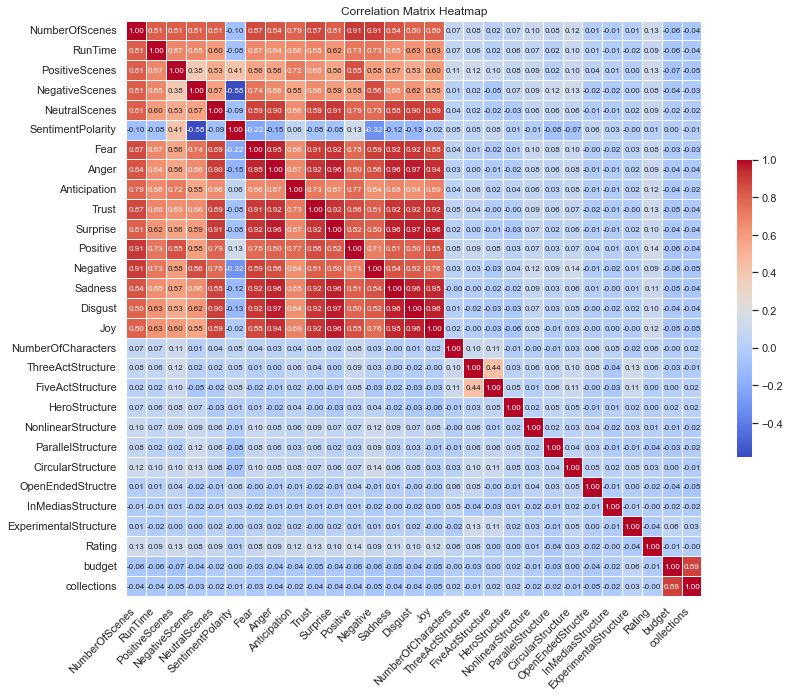

In [37]:
# Assuming 'correlation_matrix' is your Pandas DataFrame correlation matrix
sns.set(style="white")

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8})

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # adjusts subplots to give some padding
plt.show()

In [36]:
import plotly.figure_factory as ff

# Create a heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=correlation.values,
    x=list(correlation.columns),
    y=list(correlation.index),
    annotation_text=correlation.round(2).values,
    colorscale='Viridis',
    hoverinfo="z"
)
fig.update_layout(width=1000, height=800, title="Heatmap")
fig.show()


<AxesSubplot:xlabel='NumberOfScenes'>

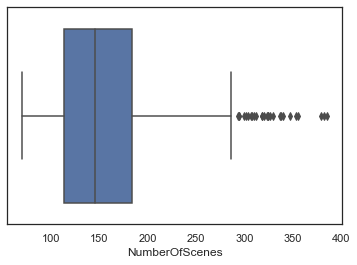

In [38]:

# Histogram
# process_df['column_name'].hist()

# Box plot
sns.boxplot(x='NumberOfScenes', data=process_df)

# Scatter plot
# sns.scatterplot(x='column1', y='column2', data=process_df)


In [42]:
# Let's assume 'target_column' is the name of your target variable
target = process_df['Rating']
predictors = process_df.drop(columns=['Rating'])

In [43]:
# Calculating correlation between each predictor and the target variable
correlations = predictors.corrwith(target)

# Displaying the correlation coefficients
print(correlations.sort_values(ascending=False))


Positive                 0.137462
Trust                    0.128636
NumberOfScenes           0.126500
PositiveScenes           0.125999
Joy                      0.124767
Anticipation             0.117603
Sadness                  0.111567
Surprise                 0.099719
Disgust                  0.097092
Anger                    0.094983
NeutralScenes            0.091815
Negative                 0.089003
RunTime                  0.086135
NegativeScenes           0.084324
Fear                     0.083107
ThreeActStructure        0.061981
NumberOfCharacters       0.055492
CircularStructure        0.027146
SentimentPolarity        0.014304
NonlinearStructure       0.011554
FiveActStructure         0.004926
HeroStructure            0.002989
InMediasStructure       -0.003433
collections             -0.004839
budget                  -0.012684
OpenEndedStructre       -0.020649
ParallelStructure       -0.039137
ExperimentalStructure   -0.040516
dtype: float64


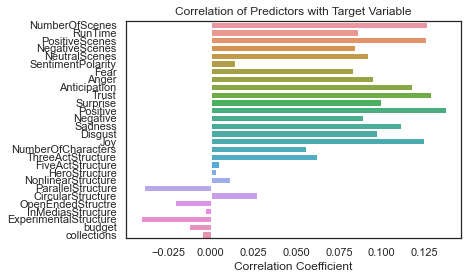

In [44]:

# Plotting the correlations
sns.barplot(x=correlations.values, y=correlations.index, orient='h')
plt.title('Correlation of Predictors with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.show()


In [66]:
# Select predictors with correlation greater than 0.5 or less than -0.5
selected_features = correlations[(correlations > 0) | (correlations < 0)].index
selected_predictors = predictors[selected_features]


In [67]:
selected_predictors.head()

,NumberOfScenes,RunTime,PositiveScenes,NegativeScenes,NeutralScenes,SentimentPolarity,Fear,Anger,Anticipation,Trust,...,FiveActStructure,HeroStructure,NonlinearStructure,ParallelStructure,CircularStructure,OpenEndedStructre,InMediasStructure,ExperimentalStructure,budget,collections
0,122,122.0,68,46,8,0.039856,18,16,10,18,...,1,1,1,0,0,1,0,0,5000000,15000000
1,169,169.0,87,53,29,0.006693,39,29,31,48,...,1,1,0,0,1,0,0,0,18000000,35000000
2,120,120.0,52,52,16,0.021793,27,15,15,25,...,0,1,1,0,1,1,0,0,3000000,2000000
3,164,164.0,85,52,27,0.051395,37,35,31,54,...,0,1,0,0,1,0,0,0,3000000,6000000
4,112,112.0,75,33,4,0.030608,9,5,10,12,...,1,1,1,0,1,0,0,0,12000000,25000000


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_predictors, target, test_size=0.2, random_state=42)

# Fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
print(f'Model R-squared: {model.score(X_test, y_test)}')


Model R-squared: -0.015023653484720567


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_predictors, target, test_size=0.2, random_state=42)

# Fitting a decision tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
print(f'Model R-squared: {model.score(X_test, y_test)}')


Model R-squared: -1.7373232352373051


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_predictors, target, test_size=0.2, random_state=42)

# Fitting an SVM regressor model
model = SVR()
model.fit(X_train, y_train)

# Evaluating the model
print(f'Model R-squared: {model.score(X_test, y_test)}')


Model R-squared: -0.11216450408818845


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_predictors, target, test_size=0.2, random_state=42)

# Fitting a random forest regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
print(f'Model R-squared: {model.score(X_test, y_test)}')


Model R-squared: -0.011247957970312195


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_predictors, target, test_size=0.2, random_state=42)

# Fitting a gradient boosting regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
print(f'Model R-squared: {model.score(X_test, y_test)}')


Model R-squared: -0.05808986533144744
